In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mdtraj as md
import matplotlib
from matplotlib.animation import FFMpegWriter, PillowWriter
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import MDAnalysis.analysis.msd as msd
from MDAnalysis.transformations import boxdimensions

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#data from ener
file = pd.read_csv('./water_aimd_1ns_every0.5fs-1.ener',skiprows=1,sep='\s+',header=None)
file.columns = ['Step','Time','Kin','Temp','Pot','Con Qty','Used time']


In [3]:
print(file.Time)

0          0.0
1          0.5
2          1.0
3          1.5
4          2.0
         ...  
1996     998.0
1997     998.5
1998     999.0
1999     999.5
2000    1000.0
Name: Time, Length: 2001, dtype: float64


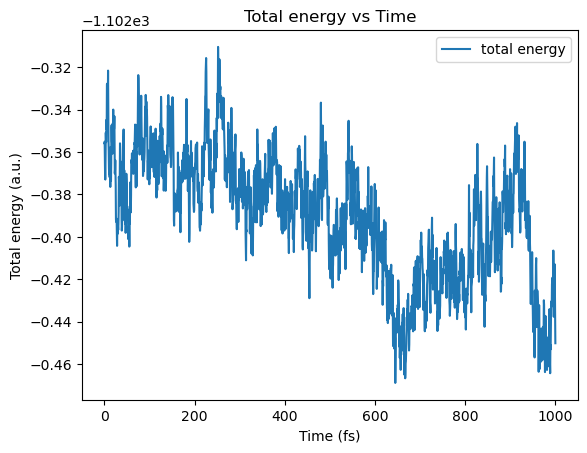

In [4]:
ene_total = file.Pot+file.Kin

plt.plot(file.Time, ene_total,label='total energy')
plt.xlabel('Time (fs)')
plt.ylabel('Total energy (a.u.)')
plt.title('Total energy vs Time')
plt.legend()
plt.savefig('Total energy vs Time.pdf')
plt.show()

In [5]:
traj = mda.Universe("./water_aimd_1ns_every0.5fs-pos-1.xyz", './water.xyz',dt=0.0005)
dim = [12.42, 12.42, 12.42, 90, 90, 90]
transform = boxdimensions.set_dimensions(dim)
traj.trajectory.add_transformations(transform)
Oxygen_select = traj.select_atoms('name O')
Oxygen_g = rdf.InterRDF(Oxygen_select,Oxygen_select)
Oxygen_g.run()

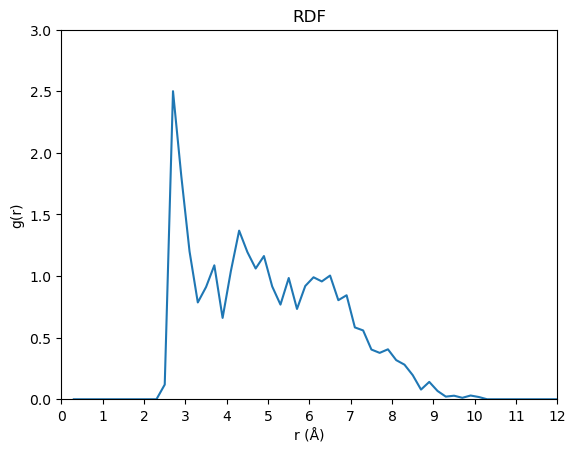

In [9]:
plt.plot(Oxygen_g.results.bins[1:], Oxygen_g.results.rdf[1:])
plt.xticks(np.arange(0,15,step=1))
plt.xlim(0, 12)
plt.ylim(0, 3)
plt.xlabel("r (Å)")
plt.ylabel('g(r)')
plt.title('RDF')
plt.savefig('RDF_Water.pdf')
plt.show()